In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [75]:
from sklearn import datasets
digits = datasets.load_digits()

In [76]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [77]:
digits_data = digits.data
digits_data.shape

(1797, 64)

In [78]:
digits_target = digits.target
digits_target.shape

(1797,)

In [79]:
digits_images = digits.images
digits_images.shape

(1797, 8, 8)

In [80]:
print(np.all(digits.images.reshape((1797,64)) == digits.data))

True


# Print the numbers

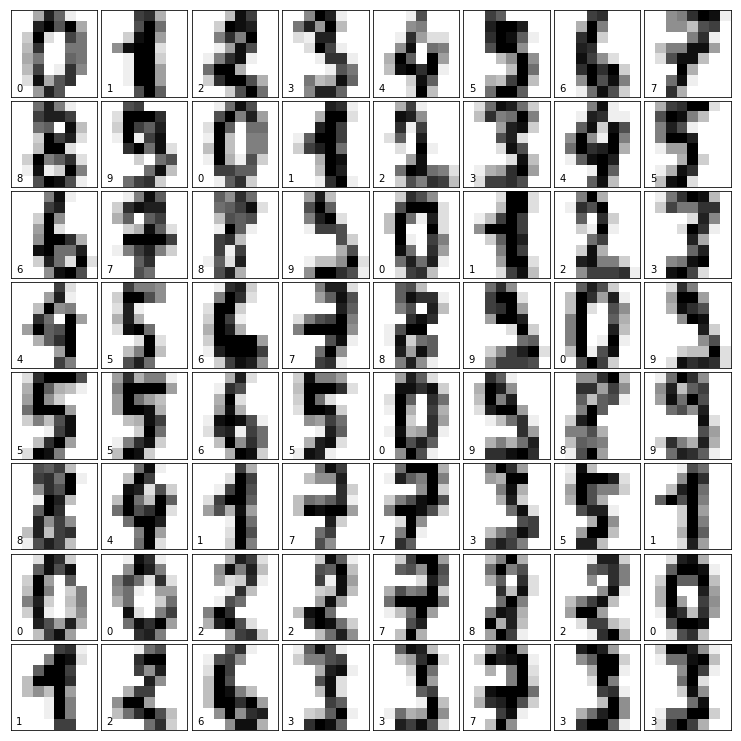

In [81]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(64):
    
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

plt.show()

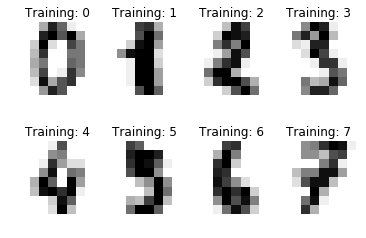

In [82]:
# Join the images and target labels in a list
images_and_labels = list(zip(digits.images, digits.target))  #suples are created!

# for every element in the list
for index, (image, label) in enumerate(images_and_labels[:8]):
    # initialize a subplot of 2X4 at the i+1-th position
    plt.subplot(2, 4, index + 1)
    # Don't plot any axes
    plt.axis('off')
    # Display images in all subplots 
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest') #turn off plotting axes with cmap=plt.cm.gray_r
    # Add a title to each subplot
    plt.title('Training: ' + str(label))

# Show the plot
plt.show()

# Try Principal Component Analysis

In [83]:
from sklearn.decomposition import RandomizedPCA, PCA

# Create a Randomized PCA model that takes two components
randomized_pca = RandomizedPCA(n_components=2)

# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)

# Inspect the shape
print(reduced_data_pca.shape)

print(reduced_data_rpca)
print(reduced_data_pca)

(1797, 2)
[[ -1.25215211  21.2738493 ]
 [  7.96372421 -20.79409457]
 [  7.00036727  -9.97602131]
 ..., 
 [ 10.83988338  -6.97804022]
 [ -4.83002386  12.40209197]
 [ -0.3270467    6.37592601]]
[[ -1.25946596  21.27488599]
 [  7.95761522 -20.7686794 ]
 [  6.99192052  -9.95599785]
 ..., 
 [ 10.80128055  -6.96026583]
 [ -4.87210045  12.42395108]
 [ -0.34439647   6.36551677]]


/Users/viveksasikumar/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


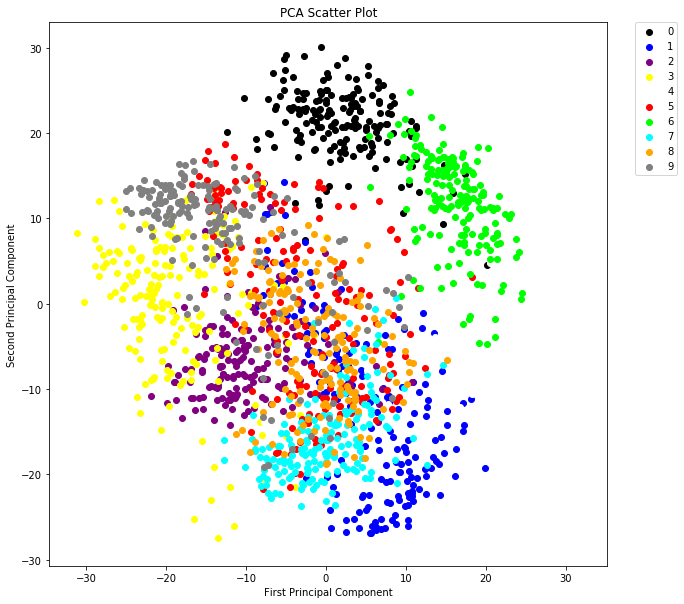

In [84]:
plt.figure(figsize=(10,10))
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][digits.target == i]
    y = reduced_data_rpca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

# Convert data to scale and train-test-image split

In [85]:
from sklearn.preprocessing import scale

data = scale(digits.data)

In [111]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target,digits.images, test_size=0.25)

In [112]:
n_samples, n_features = X_train.shape

n_samples
n_features

64

# K-Means Clustering

In [113]:
from sklearn.cluster import KMeans

clf = KMeans(init='k-means++', n_clusters=10, random_state=42)

clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

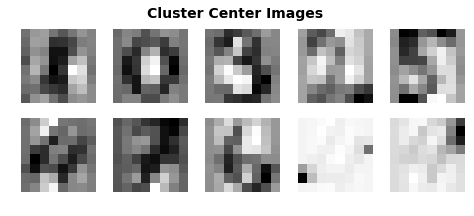

In [114]:
# Import matplotlib
import matplotlib.pyplot as plt

# Figure size in inches
fig = plt.figure(figsize=(8, 3))

# Add title
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # Display images
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    # Don't show the axes
    plt.axis('off')

# Show the plot
plt.show()

In [115]:
# Predict the labels for `X_test`
y_pred=clf.predict(X_test)

# Print out the first 100 instances of `y_pred`
print(y_pred[:100])

# Print out the first 100 instances of `y_test`
print(y_test[:100])

[5 6 2 2 0 2 4 6 2 1 2 3 0 2 4 1 0 2 7 6 0 1 2 4 2 1 6 6 3 5 5 0 1 1 7 4 6
 5 5 0 2 2 0 7 2 0 4 2 2 2 2 2 1 1 2 2 3 0 7 3 0 2 2 3 5 3 2 0 5 1 3 2 0 2
 2 1 2 5 1 2 2 5 2 3 0 0 6 3 3 1 5 3 4 0 7 2 5 0 7 2]
[4 7 9 5 1 5 5 7 9 0 8 2 9 8 5 0 1 3 6 7 2 0 9 5 2 0 7 7 2 4 4 1 0 0 6 5 7
 4 1 2 5 9 8 6 3 8 5 3 3 9 8 3 0 0 5 9 1 8 6 2 5 3 3 2 4 2 9 2 4 0 1 3 1 9
 3 0 3 9 0 3 3 4 5 2 1 1 7 2 2 0 4 2 3 8 6 9 8 1 6 9]


In [116]:
from sklearn.metrics import confusion_matrix,homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

print(confusion_matrix(y_test, y_pred))

print('% 9s' % 'inertia    homo   compl  v-meas     ARI AMI  silhouette')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          %(clf.inertia_,
      homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mutual_info_score(y_test, y_pred),
      silhouette_score(X_test, y_pred, metric='euclidean')))

[[ 0 42  0  0  0  0  0  0  0  0]
 [32  0  0  8  0  9  0  0  0  0]
 [ 5  0  1 36  0  1  1  0  0  0]
 [ 2  0 47  0  2  0  1  0  0  0]
 [ 0  0  0  0  0 36  2  0  0  1]
 [ 1  0 15  0 35  2  0  1  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  0  0  0  1  1 45  0  0  3]
 [16  0 13  1  1  1  0  0  0  0]
 [ 2  0 38  0  0  6  2  0  0  0]]
inertia    homo   compl  v-meas     ARI AMI  silhouette
53915   0.654   0.734   0.692   0.532   0.641    0.133


### Bad Fit for K-Means Clustering

# Support Vector Machines

In [117]:
from sklearn import svm

# Create the SVC model 
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')

# Fit the data to the SVC model
svc_model.fit(X_train, y_train)
#svc_model.predict(X_test)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Import GridSearchCV to identify the best fit based on parameters

In [118]:
# Import GridSearchCV
from sklearn.grid_search import GridSearchCV

# Set the parameter candidates
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on training data
clf.fit(X_train, y_train)

# Print out the results 
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

Best score for training data: 0.9747587230883444
Best `C`: 100
Best kernel: rbf
Best `gamma`: 0.001


In [119]:
# Apply the classifier to the test data, and view the accuracy score
print(clf.score(X_test, y_test)) 

# Train and score a new classifier with the grid search parameters

svc_model1 = svm.SVC(gamma=0.001, C=10., kernel='rbf')

print(svc_model1.fit(X_train, y_train).score(X_train, y_train))

predicted  = svc_model1.predict(X_test)

0.986666666667
0.988864142539


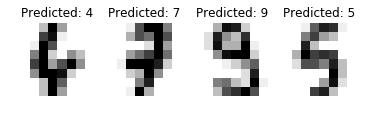

In [120]:
# Zip together the `images_test` and `predicted` values in `images_and_predictions`
images_and_predictions = list(zip(images_test, predicted))

# For the first 4 elements in `images_and_predictions`
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    # Initialize subplots in a grid of 1 by 4 at positions i+1
    plt.subplot(1, 4, index + 1)
    # Don't show axes
    plt.axis('off')
    # Display images in all subplots in the grid
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    # Add a title to the plot
    plt.title('Predicted: ' + str(prediction))

# Show the plot
plt.show()